<a href="https://colab.research.google.com/github/FeedingDejaj/MAT422/blob/main/3_5_Kmeans_and_3_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 K-means and 3.6 Support Vector Machine

By Abdula Alkhafaji with help from Generative AI.

- **K-means Clustering**: A popular unsupervised learning algorithm for grouping data points into clusters.
- **Support Vector Machine (SVM)**: A powerful supervised learning algorithm used for classification and regression tasks.



## 3.5 K-means

**K-means clustering** is an unsupervised learning algorithm used to group data points into a predefined number of clusters (\(k\)). The algorithm minimizes the within-cluster variance, assigning each point to the cluster whose centroid is nearest.

### Algorithm:
1. Initialize \(k\) cluster centroids randomly.
2. Assign each data point to the nearest centroid.
3. Update the centroids by computing the mean of the points in each cluster.
4. Repeat steps 2 and 3 until convergence (no change in assignments or centroids).

### Objective Function:
\[
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
\]
where \(C_i\) is the set of points in cluster \(i\) and \(\mu_i\) is the centroid of cluster \(i\).

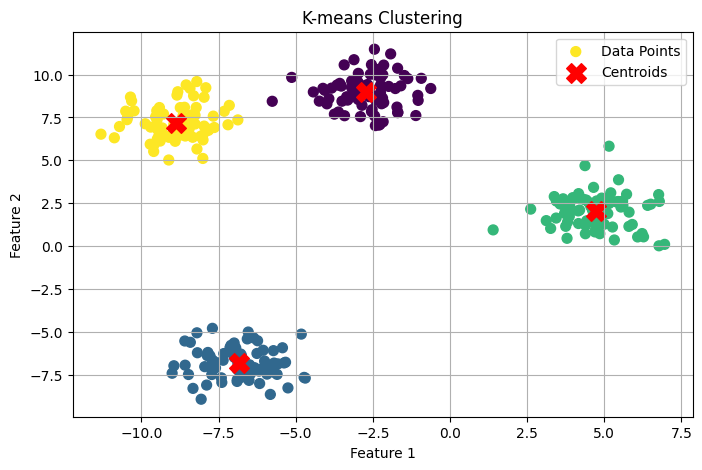

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)


kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)


plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

## 3.6 Support Vector Machine

**Support Vector Machine (SVM)** is a supervised learning algorithm used for classification and regression tasks. SVM aims to find the hyperplane that best separates data points of different classes, maximizing the margin between them.

### Key Concepts:
- **Hyperplane**: A decision boundary that separates data points into classes.
- **Margin**: The distance between the hyperplane and the nearest data points (support vectors).

### SVM Optimization Problem:
\[
\min \frac{1}{2} \|w\|^2 \quad \text{subject to } y_i (w \cdot x_i + b) \geq 1, \forall i.
\]
Here, \(w\) and \(b\) define the hyperplane.

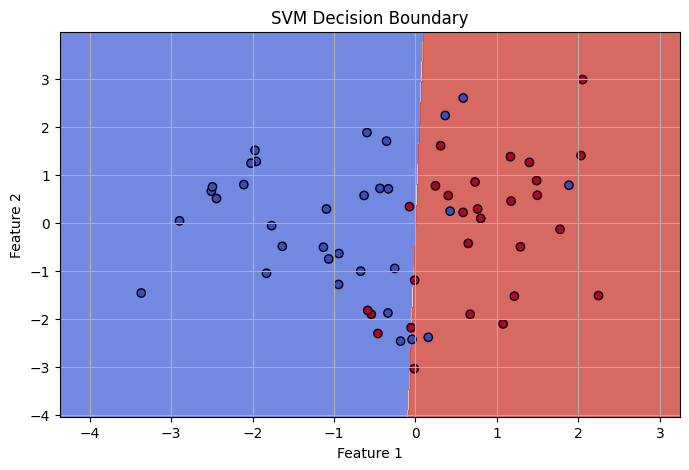

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np # Import numpy

X, y = make_classification(n_samples=200, n_features=2, n_informative=2,                            n_redundant=0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid()
    plt.show()


plot_decision_boundary(svm, X_test, y_test)